In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

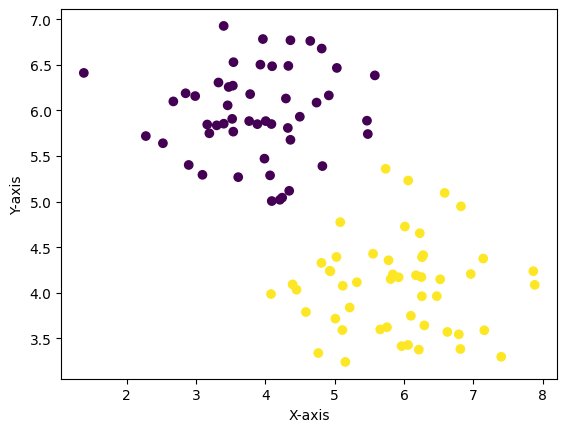

In [186]:
# Set a random seed for reproducibility
np.random.seed(42)
n_points = 50
# Class 1
class1_points = np.random.normal(loc=[4, 6], scale=[1, 0.5], size=(n_points, 2))
# Class 2
class2_points = np.random.normal(loc=[6, 4], scale=[1, 0.5], size=(n_points, 2))
# Combine the points from both classes
all_points = np.concatenate([class1_points, class2_points])
# Create labels for the classes (0 for class 1, 1 for class 2)
labels = np.array([-1] * n_points + [1] * n_points)
# Scatter plot to visualize the dataset
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [187]:
scaler = MinMaxScaler(feature_range=(-1,1))
all_points = scaler.fit_transform(all_points)
y = labels

In [188]:
X = np.ones((len(all_points), 1))
X = np.concatenate((X, all_points), axis = 1)

In [189]:
def plot_points(X):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(X[:, 1], X[:, 2], c=labels, cmap='cividis')
    plt.xlabel('X1-axis')
    plt.ylabel('X2-axis')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    return ax, fig

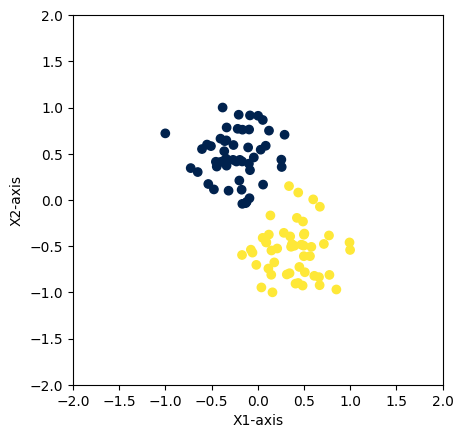

In [190]:
plot_points(X)
plt.show()

In [191]:
def plot_line(W, ax):
    start_point = [-10, (-W[0]-W[1]*(-10)) / W[2]]
    end_point = [10, (-W[0]-W[1]*(10)) / W[2]]
    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], c='k')
    ax.plot([0, W[1]], [0, W[2]], c = 'g')

In [192]:
def plot_missed_points(points, ax):
    ax.scatter(points[:, 1], points[:, 2], c='r', cmap='cividis')

In [193]:
def predict(X, W):
    return np.sign(X.dot(W))

In [194]:
learning_rate = 1

In [195]:
W = np.random.rand(3)
W[0] = 0
W = W / np.linalg.norm(W)
W_s = []
W_s.append(W)
ms_pnts = []
while True:
    y_pred = predict(X, W)
    missed_pos = np.where(np.equal(y, y_pred) == False)[0]
    if (missed_pos.shape[0] == 0):
        break
    missed_points = X[missed_pos]
    ms_pnts.append(missed_points)
    pos = np.random.choice(missed_pos, 1)
    x = X[pos].reshape(1, 3)
    W = (W + learning_rate * (y[pos] * x)).reshape(3,)
    # W = W / np.linalg.norm(W)
    W_s.append(W)

C:\Users\84866\AppData\Local\Temp\ipykernel_2228\162028078.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:, 1], points[:, 2], c='r', cmap='cividis')


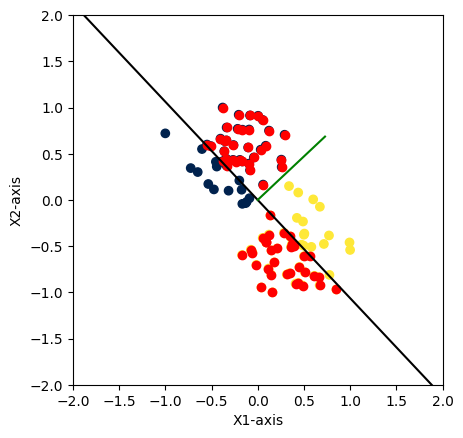

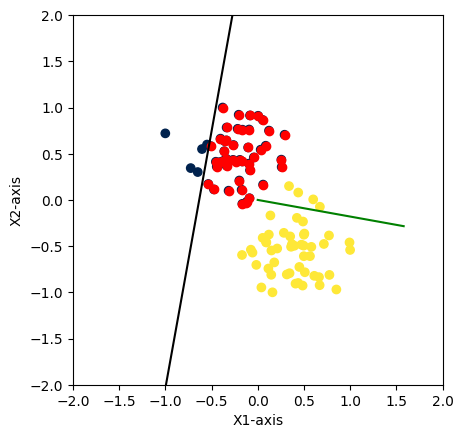

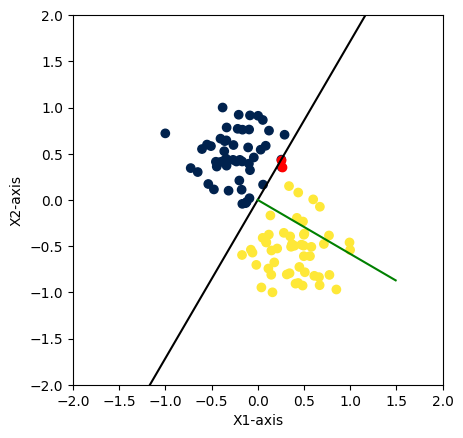

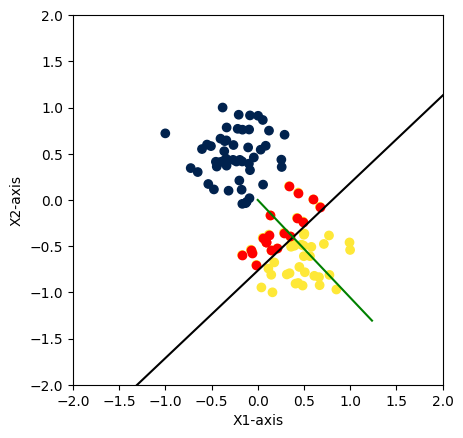

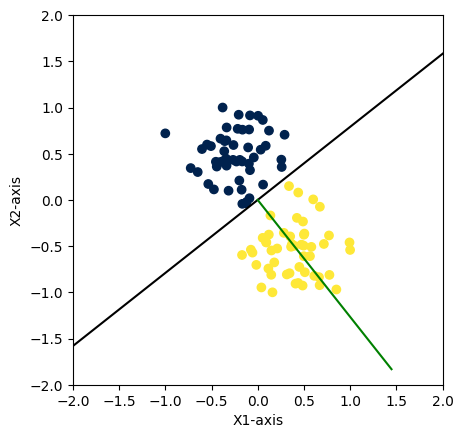

In [196]:
for i in range(len(W_s) - 1):
    ax, fig = plot_points(X)
    plot_line(W_s[i], ax)
    plot_missed_points(ms_pnts[i], ax)
    plt.show()
ax, fig = plot_points(X)
plot_line(W_s[-1], ax)
plt.show()
